In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv("./diabetes.csv")

In [3]:
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [4]:
xData = df.iloc[:,:-1]
yData = df.iloc[:,-1]

In [5]:
xData

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33
...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63
764,2,122,70,27,0,36.8,0.340,27
765,5,121,72,23,112,26.2,0.245,30
766,1,126,60,0,0,30.1,0.349,47


In [6]:
yData

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64

In [7]:
yData.value_counts()

Outcome
0    500
1    268
Name: count, dtype: int64

In [8]:
xData = xData.map(lambda x: x if x!=0 else np.nan)

In [9]:
xData.isnull().sum()

Pregnancies                 111
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
dtype: int64

In [10]:
from sklearn.model_selection import train_test_split

In [11]:
xTrain, xTest, yTrain, yTest = train_test_split(xData, yData, stratify=yData, random_state=1000)

In [12]:
yTrain.value_counts()

Outcome
0    375
1    201
Name: count, dtype: int64

In [13]:
yTest.value_counts()

Outcome
0    125
1     67
Name: count, dtype: int64

In [14]:
from sklearn.impute import KNNImputer

In [15]:
imputer = KNNImputer(n_neighbors=5)

In [16]:
imputer.fit(xTrain)

KNNImputer()

In [17]:
xTrain = pd.DataFrame(imputer.transform(xTrain), columns=xTrain.columns)
xTest = pd.DataFrame(imputer.transform(xTest), columns=xTrain.columns)

In [19]:
from sklearn.preprocessing import MinMaxScaler

In [20]:
s = MinMaxScaler()
xTrain = s.fit_transform(xTrain)
xTest = s.transform(xTest)

In [18]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, classification_report

In [22]:
model = LogisticRegression()
model.fit(xTrain, yTrain)

LogisticRegression()

In [30]:
y_pred = model.predict(xTest)
print(classification_report(yTest, y_pred))

              precision    recall  f1-score   support

           0       0.77      0.91      0.84       125
           1       0.75      0.49      0.59        67

    accuracy                           0.77       192
   macro avg       0.76      0.70      0.71       192
weighted avg       0.76      0.77      0.75       192



In [31]:
y_score = model.predict_proba(xTest)

In [60]:
model_threshold = 0.3
y_pred = (y_score[:,1] > model_threshold).astype(int)
print(classification_report(yTest, y_pred))

              precision    recall  f1-score   support

           0       0.87      0.70      0.77       125
           1       0.59      0.81      0.68        67

    accuracy                           0.73       192
   macro avg       0.73      0.75      0.73       192
weighted avg       0.77      0.73      0.74       192



In [52]:
thresholds = sorted(set(y_score[:,1]), reverse=True)

In [53]:
prc_list = []
rcl_list = []
for th in thresholds:
    y_pred = (y_score[:,1] > th).astype(int)
    prc_list.append(precision_score(yTest, y_pred))
    rcl_list.append(recall_score(yTest, y_pred))

/Users/hanif/miniconda3/envs/mlseq/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [57]:
import matplotlib.pyplot as plt

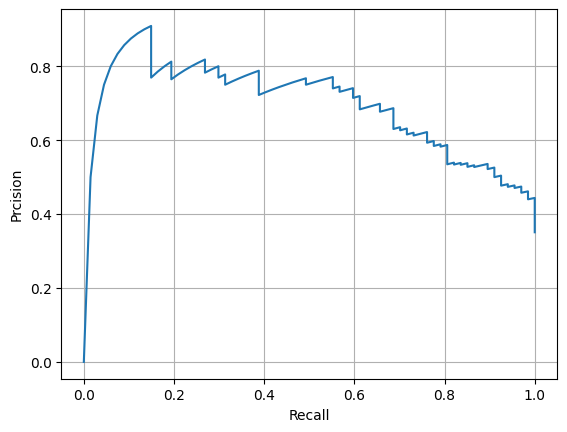

In [59]:
plt.plot(rcl_list, prc_list)
plt.xlabel("Recall")
plt.ylabel("Prcision")
plt.grid(True)

In [62]:
np.where(np.array(rcl_list) > 0.8)

(array([ 92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103, 104,
        105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117,
        118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130,
        131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143,
        144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156,
        157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169,
        170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182,
        183, 184, 185, 186, 187, 188, 189, 190, 191]),)

In [64]:
thresholds[92]

0.2994377964372899

In [65]:
model_threshold = thresholds[92]
y_pred = (y_score[:,1] > model_threshold).astype(int)
print(classification_report(yTest, y_pred))

              precision    recall  f1-score   support

           0       0.87      0.70      0.77       125
           1       0.59      0.81      0.68        67

    accuracy                           0.73       192
   macro avg       0.73      0.75      0.73       192
weighted avg       0.77      0.73      0.74       192



In [66]:
from sklearn.metrics import roc_auc_score

In [68]:
print(roc_auc_score(yTest, y_pred))

0.7509850746268657


In [69]:
print(roc_auc_score(yTest, y_score[:,1]))

0.8324776119402985


In [72]:
tpr_list = []
fpr_list = []
for th in thresholds:
    y_pred = (y_score[:,1] > th).astype(int)
    
    TP = np.sum((yTest == 1) & (y_pred == 1))
    FP = np.sum((yTest == 0) & (y_pred == 1))
    FN = np.sum((yTest == 1) & (y_pred == 0))
    TN = np.sum((yTest == 0) & (y_pred == 0))
    
    tpr = TP / (TP + FN) #true positive rate (recall)
    fpr = FP / (FP + TN) # false positive rate
    
    tpr_list.append(tpr)
    fpr_list.append(fpr)

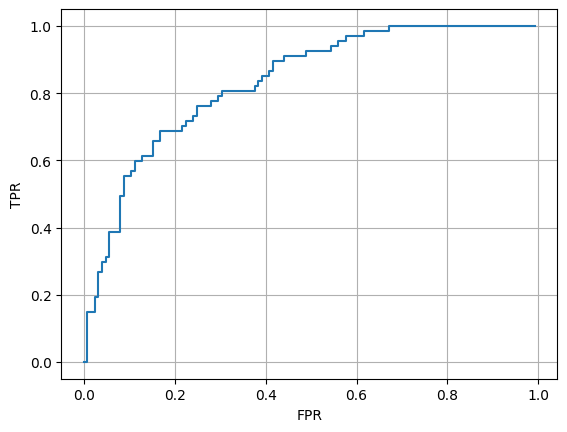

In [74]:
plt.plot(fpr_list, tpr_list)
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.grid(True)